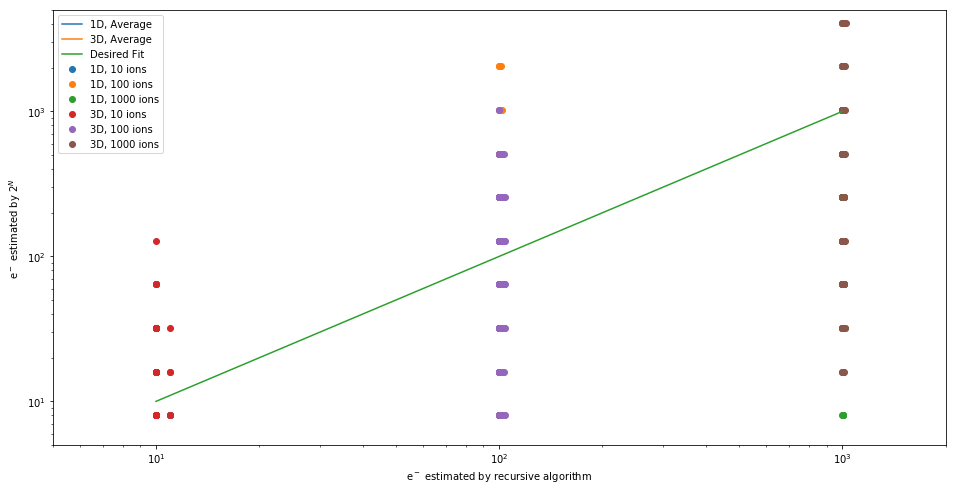

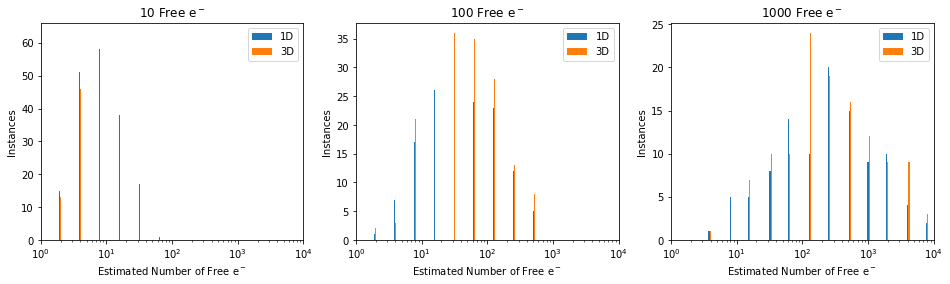

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import glob

fig = plt.figure(figsize=(16,8))

est_vals = [[[], [], []], [[], [], []]]

for j, d in enumerate([1, 3]):
    x_, y_ = [], []
    for i, m in enumerate([10, 100, 1000]):
        x, y = [], []
        avg_child_ions = 0
        for file in glob.glob('approx-versus-recursive/%i/%id/*.txt'%(m,d)):
            _t, _x, _y, _z, _ke, _drift, _ionized, _child_ions = np.loadtxt(file, delimiter=',', unpack=True, ndmin=1)
            x.append(_ionized)
            y.append(2**_child_ions)
            avg_child_ions += _child_ions
            est_vals[j][i].append(2**_child_ions)
        avg_child_ions /= 30
        plt.scatter(x, y, label='%iD, %i ions'%(d, m))
        x_.append(sum(x) / len(x))
        y_.append(2**avg_child_ions)
    plt.plot(x_, y_, label='%iD, Average'%d)

x = np.logspace(1, 3, 10)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('e$^-$ estimated by recursive algorithm')
plt.ylabel('e$^-$ estimated by $2^N$')

plt.xlim(5, 2e3)
plt.ylim(5, 5e3)

plt.plot(x, x, label='Desired Fit')

plt.legend()
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))

ax1.hist([est_vals[0][0], est_vals[1][0]], rwidth=0.9, bins=np.logspace(0, 2, 100), label=['1D', '3D'])
ax2.hist([est_vals[0][1], est_vals[1][1]], rwidth=0.9, bins=np.logspace(0, 3, 100), label=['1D', '3D'])
ax3.hist([est_vals[0][2], est_vals[1][2]], rwidth=0.9, bins=np.logspace(0, 4, 100), label=['1D', '3D'])

ax1.set_xlabel('Estimated Number of Free e$^-$')
ax2.set_xlabel('Estimated Number of Free e$^-$')
ax3.set_xlabel('Estimated Number of Free e$^-$')

ax1.set_title('10 Free e$^-$')
ax2.set_title('100 Free e$^-$')
ax3.set_title('1000 Free e$^-$')

ax1.set_ylabel('Instances')
ax2.set_ylabel('Instances')
ax3.set_ylabel('Instances')

ax1.set_xlim(1, 10000)
ax2.set_xlim(1, 10000)
ax3.set_xlim(1, 10000)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()